## Analysis of factuality metric with Llama3
This notebook analyzes the results obtained for the **Factuality** metric applied to the Llama3 model. It explores basic statistics and visualizations to understand how the scores behave.

## Data Loading
We load the JSON results file and convert it into a Pandas DataFrame for easier analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Load data from the JSON file
with open('../results/factuality_results_llama3.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df.head()

,question,model_answer,context,score,justification
0,In astronomy the concept of black bodies is ve...,A black body is a theoretical object that abso...,A black body is a theoretical object that abso...,1.000,The answer is explicitly stated in the context...
1,The International Space Station (ISS) circles ...,"According to the context, the estimated mean v...",The International Space Station (ISS) orbits E...,0.500,The answer explicitly states that the estimate...
2,What drives differentiation?,"Differentiation is driven by several factors, ...",Differentiation in products or services is dri...,0.375,The answer accurately identifies five key fact...
3,How have we been able to construct detailed ma...,"According to the context, scientists have cons...","Venus, often referred to as Earth's ""evil twin...",1.000,The answer is explicitly stated in the provide...
4,Which property of our solar system does a form...,A formation theory does not need to explain th...,The gravitational force between the planets in...,0.500,The answer is explicitly stated in the context...


## Descriptive Statistics
We calculate statistical values such as mean, median, standard deviation, and the min/max of each score type.

In [3]:
# Basic statistics on scores
score_cols = [col for col in df.columns if 'score' in col]
df[score_cols].describe()

,score
count,29.000000
mean,0.573276
std,0.259888
min,0.000000
25%,0.500000
50%,0.500000
75%,0.625000
max,1.000000


## Score Distribution Visualization
Histograms are generated to visualize how the values of each score are distributed.

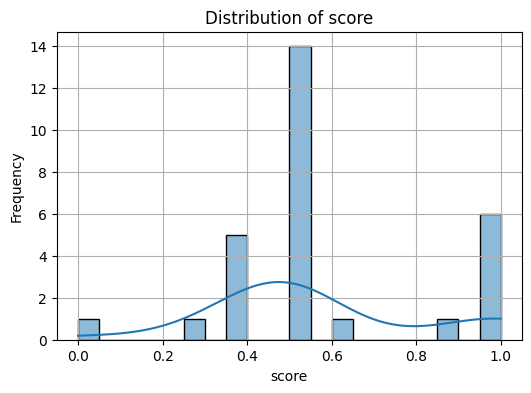

In [4]:
# Histogram of each score
for col in score_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Automatic Distribution Analysis
This section interprets score distributions based on statistical thresholds to provide insights.

In [5]:
# Automatic analysis of distributions
for col in score_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()
    print(f'--- {col} ---')
    print(f'Mean: {mean_val:.3f}, Std Dev: {std_val:.3f}')
    print(f'Range: {min_val:.3f} - {max_val:.3f}')
    if std_val < 0.1:
        print('-> Scores are highly concentrated. May indicate low variability.')
    elif std_val > 0.25:
        print('-> Good score dispersion. Variability is high.')
    if mean_val > 0.85:
        print('-> Most responses scored high.')
    elif mean_val < 0.5:
        print('-> Many responses scored low. Model performance may be questionable.')
    print()

--- score ---
Mean: 0.573, Std Dev: 0.260
Range: 0.000 - 1.000
-> Good score dispersion. Variability is high.



# Five less factual responses 
To complement the quantitative analysis, we manually inspect some of the examples with the lowest **factuality_score**.  This helps identify specific cases where the model fails to adhere to the given context, either by hallucinating information or omitting relevant facts.

In [6]:
lowest_factual = df.sort_values(by='score').head(5)
for idx, row in lowest_factual.iterrows():
    print(f"--- Example {idx} ---")
    print(f"Factuality Score: {row['score']:.3f}")
    print(f"Answer: {row['model_answer']}")
    print(f"Context: {row['context']}")
    print("-" * 80)

--- Example 23 ---
Factuality Score: 0.000
Answer: Finding shelter
Context: Among animals, one potential explanation for migration is seasonal reproduction requirements. While many species do migrate in search of mating and breeding opportunities, some animals may remain in their original habitats year-round to reproduce. Therefore, reproductive needs alone are not always a sufficient reason for migration. Other common causes of migration include finding food sources, avoiding harsh weather conditions, and escaping predators or competition for resources.
--------------------------------------------------------------------------------
--- Example 9 ---
Factuality Score: 0.250
Answer: According to the context, the correct answer is:

"Escape of gas molecules due to weak gravitational pull"

This mechanism can contribute to atmospheric loss on Mercury, but it is not the primary reason for its lack of a permanent atmosphere. The intense solar radiation and high temperatures on Mercury's su